## Get Indian Stock Market Data using UPSTOX API
https://upstox.com/developer/api-documentation/get-historical-candle-data

Also refer tutorials for upstox: https://github.com/aeron7/pinakin_upstox_api/blob/main/Tutorials/Upstox_API_Integration_Part_I.ipynb

In [ ]:
# download the stocks info (name/symbol etc) for NSE/BSE from https://upstox.com/developer/api-documentation/instruments#json-files

## Search stock instrument_key

In [1]:
import json
import re

STOCKS_INFO_JSON_FILEPATH = "NSE.json"

def search_stock(name_or_symbol, exchange="NSE", instrument_type="EQ"):
    """
    Search for all dictionaries matching the stock symbol or name pattern in a large JSON file.

    Args:
        name_or_symbol (str): Trading symbol or name of the stock.
        exchange (str): Stock exchange name (default: "NSE"). NSE/BSE
        instrument_type (str): Instrument type (default: "EQ"). EQ/FO/INDEX

    Returns:
        list: List of matching dictionaries.
    """
    results = []
    pattern = re.compile(name_or_symbol, re.IGNORECASE)

    # Read and parse the JSON file in chunks
    with open(STOCKS_INFO_JSON_FILEPATH, 'r') as file:
        data = json.load(file)  # Load entire JSON (works for large JSON up to a reasonable size)

        # search for stock symbol
        for record in data:
            if record['exchange'].lower() == exchange.lower() and record['instrument_type'].lower() == instrument_type.lower():
                if record.get('trading_symbol', '').lower() == name_or_symbol.lower():
                    results.append(record)
        
        # if symbol not found, search for name
        # search for stock symbol
        for record in data:
            if record['exchange'].lower() == exchange.lower() and record['instrument_type'].lower() == instrument_type.lower():
                if pattern.search(record.get('name', '')):
                    results.append(record)
    
    return results

In [2]:
# instrument_key = exchange_InstrumentType_ISIN (NSE/BSE)_(EQ/INDEX/FO)_
# eg. NSE_INDEX|Nifty 50, NSE_EQ|INE040A01034  for hdfcbank

stock_name_or_symbol = 'HDFCBANK'  # if symbol is known provide symbol, else provide name to search 
matching_records = search_stock(stock_name_or_symbol)

# Print the number of matches and sample results
print(f"Found {len(matching_records)} matching records.")
print('name, exchange, trading_symbol, instrument_type, instrument_key')
for record in matching_records[:5]:  # Display first 5 matches
    print(record['name'], record['exchange'], record['trading_symbol'], record['instrument_type'], record['instrument_key'], sep=', ')
if len(matching_records) > 5:
    print("...")

Found 1 matching records.
name, exchange, trading_symbol, instrument_type, instrument_key
HDFC BANK LTD, NSE, HDFCBANK, EQ, NSE_EQ|INE040A01034


In [3]:
import matplotlib.pyplot as plt

def plot_chart(df, instrument_key):
  # Plot the OHLC Data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Open'], label='Open', linestyle='--', color='blue')
    plt.plot(df.index, df['High'], label='High', linestyle='-', color='green')
    plt.plot(df.index, df['Low'], label='Low', linestyle='-', color='red')
    plt.plot(df.index, df['Close'], label='Close', linestyle='-', color='orange')
    
    # Add Labels and Title
    plt.title(f"{instrument_key} OHLC Data", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Show the Plot
    plt.show()

## Historical Data

In [4]:
import requests
import pandas as pd

# API Endpoint and Parameters
API_BASE_URL = 'https://api.upstox.com/v2'

HEADERS = {
    "Accept": "application/json",
}

# Parameters for the API request

# instrument_key = exchange_type_isin (NSE/BSE)_(EQ/INDEX/FO)_
# eg. NSE_INDEX|Nifty 50, NSE_EQ|INE040A01034  for hdfcbank
instrument_key = "NSE_EQ|INE040A01034"  # Replace with your stock's unique identifier
interval = "day"  # Options: 1minute, 30minute, day, week, month
to_date = "2025-01-21"  # Ending date for the data
from_date = "2024-01-20"  # Starting date for the data

# Construct the API URL with the endpoint and parameters
API_URL = f"{API_BASE_URL}/historical-candle/{instrument_key}/{interval}/{to_date}/{from_date}"

# Fetch Historical Candle Data
response = requests.get(API_URL, headers=HEADERS)



In [5]:
if response.status_code == 200:
  # Convert JSON to DataFrame
  data = response.json()
  df = pd.DataFrame(data['data']['candles'], columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest'])
  
  # Ensure the DataFrame has proper datetime formatting
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
  df.set_index('Timestamp', inplace=True)

else:
  print(f"Error: {response.status_code}, {response.text}")


In [6]:
df

,Open,High,Low,Close,Volume,Open Interest
Timestamp,,,,,,
2025-01-21 00:00:00+05:30,1658.25,1661.05,1633.05,1642.40,15579072,0
2025-01-20 00:00:00+05:30,1626.00,1660.95,1626.00,1651.25,8778809,0
2025-01-17 00:00:00+05:30,1643.50,1650.50,1628.50,1636.75,11556038,0
2025-01-16 00:00:00+05:30,1652.85,1660.55,1642.85,1652.05,10606227,0
2025-01-15 00:00:00+05:30,1656.50,1662.70,1636.30,1643.05,7011446,0
...,...,...,...,...,...,...
2024-01-29 00:00:00+05:30,1448.05,1462.80,1445.80,1454.65,32822749,0
2024-01-25 00:00:00+05:30,1452.50,1457.35,1419.40,1434.90,49470926,0
2024-01-24 00:00:00+05:30,1380.25,1458.45,1380.25,1455.90,43002202,0


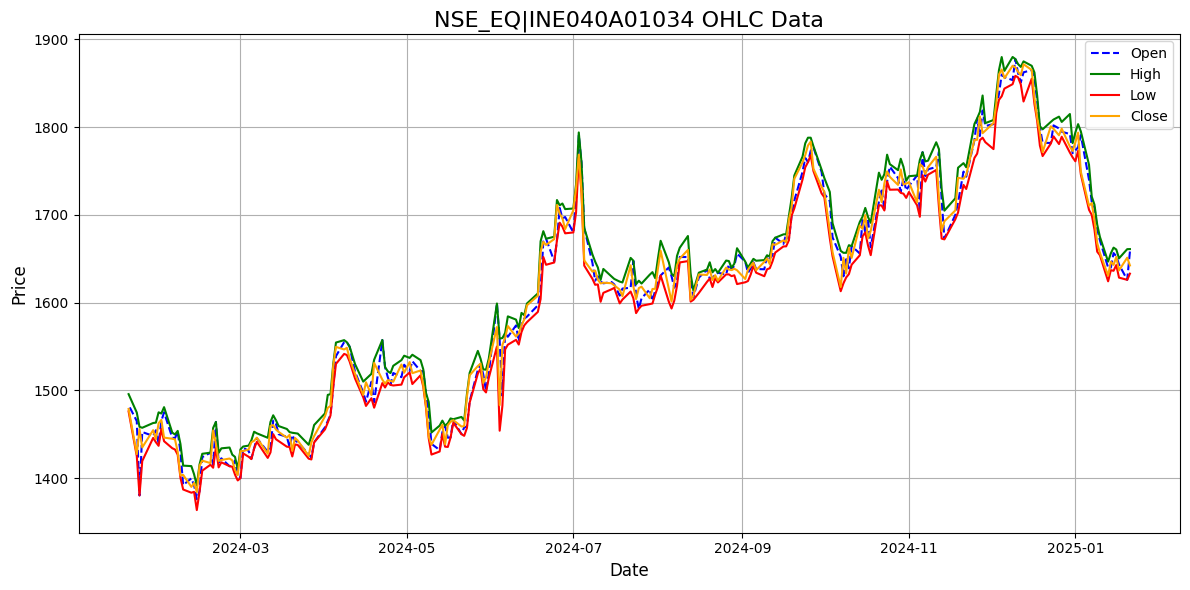

In [7]:
plot_chart(df, instrument_key)

## INTRADAY DATA

In [8]:
import requests
import pandas as pd

# API Endpoint and Parameters
API_BASE_URL = 'https://api.upstox.com/v2'

HEADERS = {
    "Accept": "application/json",
}

# Parameters for the API request

# instrument_key = exchange_type_isin (NSE/BSE)_(EQ/INDEX/FO)_
#NSE_INDEX|Nifty 50, NSE_EQ|INE040A01034  for hdfcbank
instrument_key = "NSE_EQ|INE040A01034"  # Replace with your stock's unique identifier
interval = "1minute"  # Options: 1minute, 30minute

# Construct the API URL with the endpoint and parameters
API_URL = f"{API_BASE_URL}/historical-candle/intraday/{instrument_key}/{interval}"

# Fetch Historical Candle Data
response = requests.get(API_URL, headers=HEADERS)

In [9]:
if response.status_code == 200:
  # Convert JSON to DataFrame
    data = response.json()
    df = pd.DataFrame(data['data']['candles'], columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest'])

    # Ensure the DataFrame has proper datetime formatting
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)

else:
    print(f"Error: {response.status_code}, {response.text}")


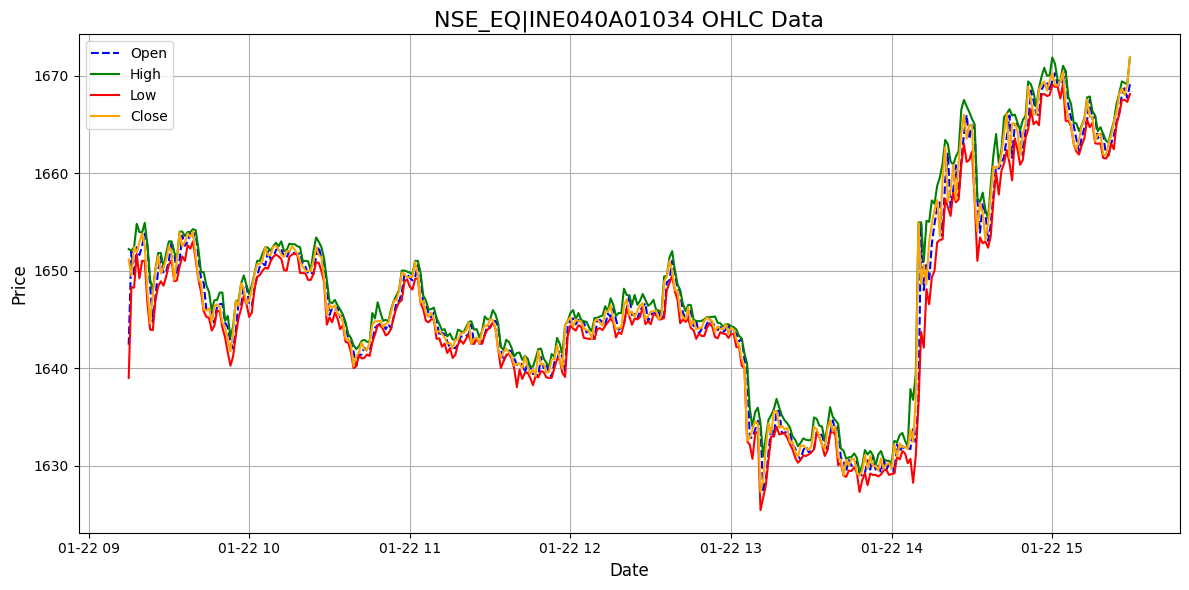

In [10]:
plot_chart(df, instrument_key)

In [11]:
df

,Open,High,Low,Close,Volume,Open Interest
Timestamp,,,,,,
2025-01-22 15:29:00+05:30,1669.10,1671.90,1668.10,1671.90,52082,0
2025-01-22 15:28:00+05:30,1667.70,1669.10,1667.30,1669.05,62485,0
2025-01-22 15:27:00+05:30,1668.70,1669.25,1667.50,1668.00,100559,0
2025-01-22 15:26:00+05:30,1668.05,1669.40,1667.50,1668.70,91937,0
2025-01-22 15:25:00+05:30,1666.20,1668.15,1666.00,1668.05,148914,0
...,...,...,...,...,...,...
2025-01-22 09:19:00+05:30,1651.60,1653.95,1649.20,1652.90,44773,0
2025-01-22 09:18:00+05:30,1652.40,1654.80,1651.70,1651.90,55483,0
2025-01-22 09:17:00+05:30,1649.45,1652.40,1648.25,1652.40,45428,0
